<a href="https://colab.research.google.com/github/viniciusbeckerdesouza/conversao_marketplace/blob/main/An%C3%A1lise_de_convers%C3%A3o_em_um_Maketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/viniciusbeckerdesouza/conversao_marketplace/main/marketplace.csv')

In [4]:
df.describe()

,Unnamed: 0,vendas,acessos,gmv
count,33295.000000,33295.000000,33295.000000,33295.000000
mean,16647.000000,2.154678,9.406728,560.229647
std,9611.582943,6.463894,37.340237,2689.440502
min,0.000000,1.000000,1.000000,0.000000
25%,8323.500000,1.000000,1.000000,12.850000
50%,16647.000000,1.000000,2.000000,43.330000
75%,24970.500000,1.000000,4.000000,192.030000
max,33294.000000,217.000000,2898.000000,142970.360000


In [5]:
df.head()

,Unnamed: 0,vendas,acessos,data,gmv,tipo,parceiro
0,0,1,1,2019-01-01,7.11,Padrão,parceiro539
1,1,1,1,2019-01-01,29.88,Padrão,parceiro236
2,2,1,1,2019-01-01,10.82,Padrão,parceiro100
3,3,1,1,2019-01-01,6.94,Padrão,parceiro507
4,4,1,1,2019-01-01,6.66,Padrão,parceiro427


In [6]:
df['data'] = pd.to_datetime(df['data'])

In [7]:
import datetime

df['month'] = df['data'].dt.month

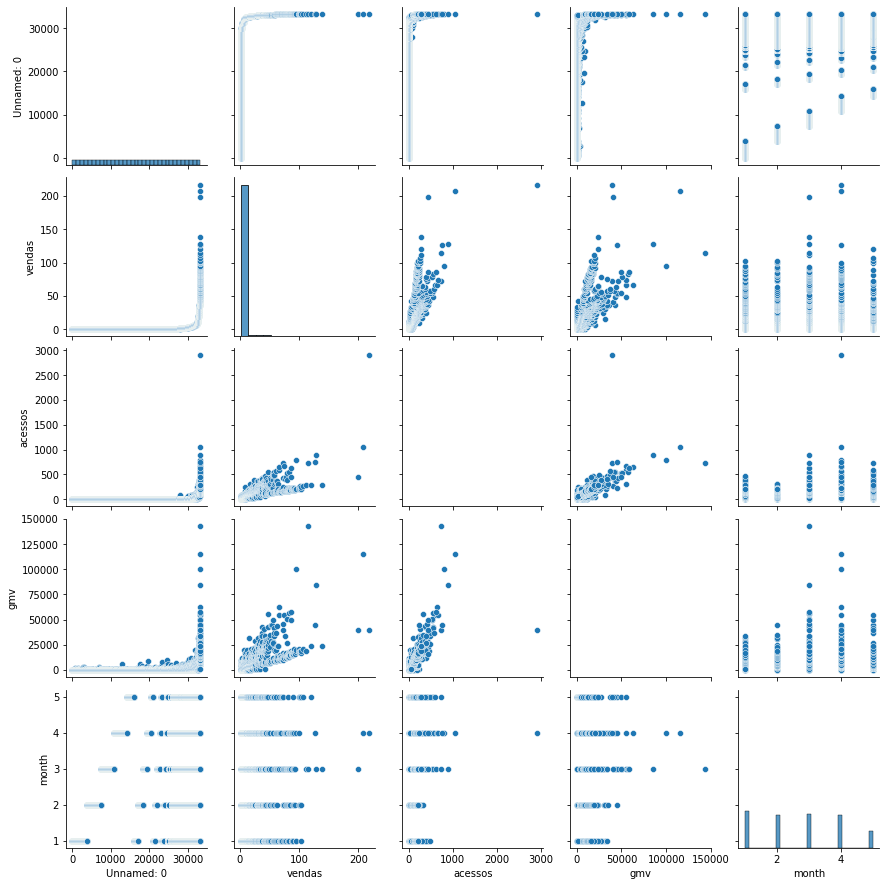

In [8]:
sns.pairplot(data=df)

In [9]:
df['tipo'] = df['tipo'].astype('category')
df['parceiro'] = df['parceiro'].astype('category')
df['month'] = df['month'].astype('category')
df_dummies = pd.get_dummies(df)

In [10]:
df_dummies.head()

,Unnamed: 0,vendas,acessos,data,gmv,tipo_Padrão,tipo_Promocional,parceiro_parceiro1,parceiro_parceiro10,parceiro_parceiro100,parceiro_parceiro101,parceiro_parceiro102,parceiro_parceiro103,parceiro_parceiro104,parceiro_parceiro105,parceiro_parceiro106,parceiro_parceiro107,parceiro_parceiro108,parceiro_parceiro109,parceiro_parceiro11,parceiro_parceiro110,parceiro_parceiro111,parceiro_parceiro112,parceiro_parceiro113,parceiro_parceiro114,parceiro_parceiro115,parceiro_parceiro116,parceiro_parceiro117,parceiro_parceiro118,parceiro_parceiro119,parceiro_parceiro12,parceiro_parceiro120,parceiro_parceiro121,parceiro_parceiro122,parceiro_parceiro123,parceiro_parceiro124,parceiro_parceiro125,parceiro_parceiro126,parceiro_parceiro127,parceiro_parceiro128,...,parceiro_parceiro68,parceiro_parceiro69,parceiro_parceiro7,parceiro_parceiro70,parceiro_parceiro71,parceiro_parceiro72,parceiro_parceiro73,parceiro_parceiro74,parceiro_parceiro75,parceiro_parceiro76,parceiro_parceiro77,parceiro_parceiro78,parceiro_parceiro79,parceiro_parceiro8,parceiro_parceiro80,parceiro_parceiro81,parceiro_parceiro82,parceiro_parceiro83,parceiro_parceiro84,parceiro_parceiro85,parceiro_parceiro86,parceiro_parceiro87,parceiro_parceiro88,parceiro_parceiro89,parceiro_parceiro9,parceiro_parceiro90,parceiro_parceiro91,parceiro_parceiro92,parceiro_parceiro93,parceiro_parceiro94,parceiro_parceiro95,parceiro_parceiro96,parceiro_parceiro97,parceiro_parceiro98,parceiro_parceiro99,month_1,month_2,month_3,month_4,month_5
0,0,1,1,2019-01-01,7.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,1,2019-01-01,29.88,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,1,1,2019-01-01,10.82,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,1,1,2019-01-01,6.94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,1,1,2019-01-01,6.66,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [11]:
#Quantidade de lojas
l = list(df['parceiro'].unique())
len(l)

621

In [12]:
#Dia com mais vendas
df['vendas'].max()

217

In [13]:
df.query("vendas >= 217")

,Unnamed: 0,vendas,acessos,data,gmv,tipo,parceiro,month
33294,33294,217,2898,2019-04-15,39252.03,Padrão,parceiro101,4


In [14]:
#Conversões abril

abril = df.query("month == 4")
abril_por_loja = abril.groupby('parceiro').sum().reset_index()
abril_por_loja['conversao'] = abril_por_loja['vendas']/abril_por_loja['acessos']
abril_por_loja.head()

,parceiro,Unnamed: 0,vendas,acessos,gmv,conversao
0,parceiro1,620192,30,72,6692.39,0.416667
1,parceiro10,200596,16,16,738.53,1.000000
2,parceiro100,556497,30,61,1204.92,0.491803
3,parceiro101,988286,1145,8583,353403.90,0.133403
4,parceiro102,617640,29,75,7057.65,0.386667


In [15]:
#Conversões maio

maio = df.query("month == 5")
maio_por_loja = maio.groupby('parceiro').sum().reset_index()
maio_por_loja['conversao'] = maio_por_loja['vendas']/maio_por_loja['acessos']
maio_por_loja.head()

,parceiro,Unnamed: 0,vendas,acessos,gmv,conversao
0,parceiro1,316445,15,37,2134.42,0.405405
1,parceiro10,118381,8,8,178.30,1.000000
2,parceiro100,282535,15,25,604.78,0.600000
3,parceiro101,462573,529,3295,175431.43,0.160546
4,parceiro102,370944,15,67,7744.47,0.223881


In [16]:
#Variação na conversão

por_mes = df.groupby('month').sum().reset_index()
por_mes['conversao'] = por_mes['vendas'] / por_mes['acessos']
por_mes

,month,Unnamed: 0,vendas,acessos,gmv,conversao
0,1,107064291,16590,67140,3913206.83,0.247096
1,2,108582576,14578,56392,3476037.72,0.258512
2,3,127845254,16546,70164,4652308.91,0.235819
3,4,135769107,15885,78599,4294167.82,0.202102
4,5,75000637,8141,40902,2317124.82,0.199037


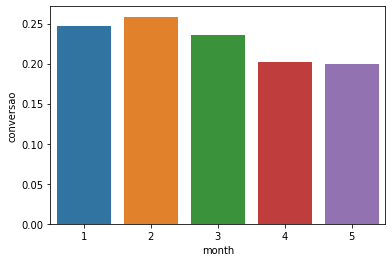

In [17]:
sns.barplot(data=por_mes, x='month', y='conversao')
plt.show()

In [18]:
media_por_mes = df.groupby('month').mean().reset_index()
media_por_mes['conversao'] = media_por_mes['vendas'] / media_por_mes['acessos']
media_por_mes

,month,Unnamed: 0,vendas,acessos,gmv,conversao
0,1,13303.217073,2.061382,8.342445,486.233453,0.247096
1,2,15129.242859,2.031211,7.857322,484.330183,0.258512
2,3,17246.088493,2.232025,9.464994,627.587874,0.235819
3,4,19285.384517,2.256392,11.164631,609.967020,0.202102
4,5,20735.592203,2.250760,11.308267,640.620630,0.199037


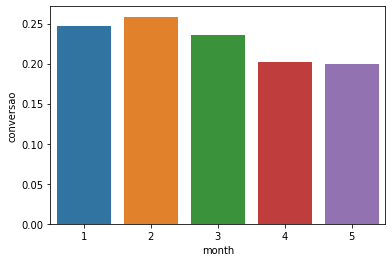

In [19]:
sns.barplot(data=media_por_mes, x='month', y='conversao')

In [20]:
#GMV total por mês

por_mes = df.groupby('month').sum().reset_index()
por_mes

,month,Unnamed: 0,vendas,acessos,gmv
0,1,107064291,16590,67140,3913206.83
1,2,108582576,14578,56392,3476037.72
2,3,127845254,16546,70164,4652308.91
3,4,135769107,15885,78599,4294167.82
4,5,75000637,8141,40902,2317124.82


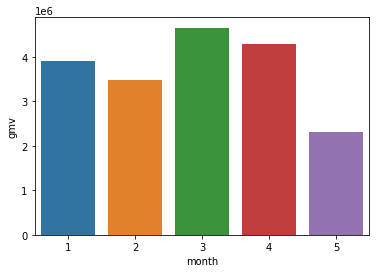

In [21]:
sns.barplot(data=por_mes, x='month', y='gmv')
plt.show()

In [22]:
#GMV acumulado 18/02 - 20/04



In [23]:
#Lojas com promoção

promo = df.query("tipo == 'Promocional'")

por_loja = promo.groupby('parceiro').sum().reset_index()


In [24]:
#Quanto cada loja vendeu em promoção

promo_vendas = por_loja.sort_values('vendas').iloc[-5:]
promo_vendas

,parceiro,Unnamed: 0,vendas,acessos,gmv
151,parceiro235,378989,63,768,47621.70
149,parceiro233,393049,225,1976,46634.24
212,parceiro290,394704,310,3135,273380.74
273,parceiro345,396710,461,3131,261834.78
282,parceiro353,398539,1047,2537,185150.55


In [25]:
#Período promocional

promo['data'].sort_values().unique()

array(['2019-03-20T00:00:00.000000000', '2019-03-21T00:00:00.000000000',
       '2019-03-22T00:00:00.000000000', '2019-03-23T00:00:00.000000000',
       '2019-03-24T00:00:00.000000000', '2019-03-25T00:00:00.000000000',
       '2019-03-26T00:00:00.000000000', '2019-03-27T00:00:00.000000000',
       '2019-03-28T00:00:00.000000000', '2019-03-29T00:00:00.000000000',
       '2019-03-30T00:00:00.000000000', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

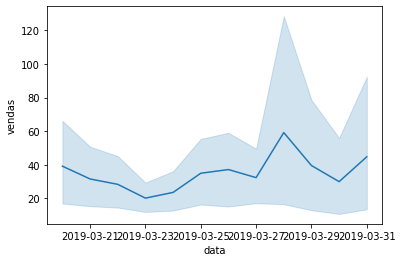

In [26]:
sns.lineplot(data=promo, x='data', y='vendas')

In [27]:
#Outros



# dashbord

In [28]:
#Import necessary Bokeh modules
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.io import output_notebook, show
from bokeh.palettes import RdBu
from bokeh.transform import linear_cmap, jitter

In [29]:
#Set up Bokeh to work in Jupyter notebook
output_notebook()

In [30]:
df.head()
# df['gmv'].max()

,Unnamed: 0,vendas,acessos,data,gmv,tipo,parceiro,month
0,0,1,1,2019-01-01,7.11,Padrão,parceiro539,1
1,1,1,1,2019-01-01,29.88,Padrão,parceiro236,1
2,2,1,1,2019-01-01,10.82,Padrão,parceiro100,1
3,3,1,1,2019-01-01,6.94,Padrão,parceiro507,1
4,4,1,1,2019-01-01,6.66,Padrão,parceiro427,1


In [31]:
#Make groupby into a new DataFrame
gmv_df = df.groupby(['tipo', 'parceiro', 'month'])[['vendas', 'acessos', 'gmv']].sum()\
.sort_values(by='gmv', ascending=False).reset_index()

# Set up the source data that will suppply the x,y columns and the film title hover text
source = ColumnDataSource(gmv_df)

# Set the hover tool tip to the film title, release year, and proportion of dialogue

TOOLTIPS = [("parceiro", "@parceiro"),
            ("vendas", "@vendas"),
            ("tipo", "@tipo"),
           ("gmv", "@{gmv}{0.2f}")]

#Set up Bokeh plot with title, labels, 
bokeh_plot = figure(title="Quanto cada loja teve de GMV", x_axis_label = 'Mês',
                    y_axis_label = 'GMV',x_range = [1, 5], y_range = [0, 143000],
                 tooltips=TOOLTIPS, width=800, height=550, active_scroll='wheel_zoom')

# Create a red to blue color palette
color_mapper = linear_cmap(field_name='gmv', palette=RdBu[4], low=1.1, high=0)

# Supply inidivudal points values
bokeh_plot.circle(y='gmv', x=jitter('month', width=.2),
         size = 10,
        line_color='black',
        line_alpha=.4,
         source=source,
         color=color_mapper, alpha=.5)

bokeh_plot.title.text_font_size='20pt'

#Make Y axis percentages
# bokeh_plot.yaxis.formatter = NumeralTickFormatter(format='0 %')

show(bokeh_plot)

# Machine learning

In [32]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/meliuz.csv')

In [33]:
df.head()

,Unnamed: 0,vendas,acessos,data,gmv,tipo,parceiro
0,0,1,1,2019-01-01,7.11,Padrão,parceiro539
1,1,1,1,2019-01-01,29.88,Padrão,parceiro236
2,2,1,1,2019-01-01,10.82,Padrão,parceiro100
3,3,1,1,2019-01-01,6.94,Padrão,parceiro507
4,4,1,1,2019-01-01,6.66,Padrão,parceiro427


In [34]:
df['conversão'] = df['vendas'] / df['acessos']

In [35]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,vendas,acessos,data,gmv,tipo,parceiro,conversão
0,1,1,2019-01-01,7.11,Padrão,parceiro539,1.0
1,1,1,2019-01-01,29.88,Padrão,parceiro236,1.0
2,1,1,2019-01-01,10.82,Padrão,parceiro100,1.0
3,1,1,2019-01-01,6.94,Padrão,parceiro507,1.0
4,1,1,2019-01-01,6.66,Padrão,parceiro427,1.0


In [36]:
df_dummies = pd.get_dummies(df)

In [37]:
df_dummies.head()

,vendas,acessos,gmv,conversão,data_2019-01-01,data_2019-01-02,data_2019-01-03,data_2019-01-04,data_2019-01-05,data_2019-01-06,data_2019-01-07,data_2019-01-08,data_2019-01-09,data_2019-01-10,data_2019-01-11,data_2019-01-12,data_2019-01-13,data_2019-01-14,data_2019-01-15,data_2019-01-16,data_2019-01-17,data_2019-01-18,data_2019-01-19,data_2019-01-20,data_2019-01-21,data_2019-01-22,data_2019-01-23,data_2019-01-24,data_2019-01-25,data_2019-01-26,data_2019-01-27,data_2019-01-28,data_2019-01-29,data_2019-01-30,data_2019-01-31,data_2019-02-01,data_2019-02-02,data_2019-02-03,data_2019-02-04,data_2019-02-05,...,parceiro_parceiro63,parceiro_parceiro64,parceiro_parceiro65,parceiro_parceiro66,parceiro_parceiro67,parceiro_parceiro68,parceiro_parceiro69,parceiro_parceiro7,parceiro_parceiro70,parceiro_parceiro71,parceiro_parceiro72,parceiro_parceiro73,parceiro_parceiro74,parceiro_parceiro75,parceiro_parceiro76,parceiro_parceiro77,parceiro_parceiro78,parceiro_parceiro79,parceiro_parceiro8,parceiro_parceiro80,parceiro_parceiro81,parceiro_parceiro82,parceiro_parceiro83,parceiro_parceiro84,parceiro_parceiro85,parceiro_parceiro86,parceiro_parceiro87,parceiro_parceiro88,parceiro_parceiro89,parceiro_parceiro9,parceiro_parceiro90,parceiro_parceiro91,parceiro_parceiro92,parceiro_parceiro93,parceiro_parceiro94,parceiro_parceiro95,parceiro_parceiro96,parceiro_parceiro97,parceiro_parceiro98,parceiro_parceiro99
0,1,1,7.11,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,29.88,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,10.82,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,6.94,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,6.66,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
df_dummies.corr()

,vendas,acessos,gmv,conversão,data_2019-01-01,data_2019-01-02,data_2019-01-03,data_2019-01-04,data_2019-01-05,data_2019-01-06,data_2019-01-07,data_2019-01-08,data_2019-01-09,data_2019-01-10,data_2019-01-11,data_2019-01-12,data_2019-01-13,data_2019-01-14,data_2019-01-15,data_2019-01-16,data_2019-01-17,data_2019-01-18,data_2019-01-19,data_2019-01-20,data_2019-01-21,data_2019-01-22,data_2019-01-23,data_2019-01-24,data_2019-01-25,data_2019-01-26,data_2019-01-27,data_2019-01-28,data_2019-01-29,data_2019-01-30,data_2019-01-31,data_2019-02-01,data_2019-02-02,data_2019-02-03,data_2019-02-04,data_2019-02-05,...,parceiro_parceiro63,parceiro_parceiro64,parceiro_parceiro65,parceiro_parceiro66,parceiro_parceiro67,parceiro_parceiro68,parceiro_parceiro69,parceiro_parceiro7,parceiro_parceiro70,parceiro_parceiro71,parceiro_parceiro72,parceiro_parceiro73,parceiro_parceiro74,parceiro_parceiro75,parceiro_parceiro76,parceiro_parceiro77,parceiro_parceiro78,parceiro_parceiro79,parceiro_parceiro8,parceiro_parceiro80,parceiro_parceiro81,parceiro_parceiro82,parceiro_parceiro83,parceiro_parceiro84,parceiro_parceiro85,parceiro_parceiro86,parceiro_parceiro87,parceiro_parceiro88,parceiro_parceiro89,parceiro_parceiro9,parceiro_parceiro90,parceiro_parceiro91,parceiro_parceiro92,parceiro_parceiro93,parceiro_parceiro94,parceiro_parceiro95,parceiro_parceiro96,parceiro_parceiro97,parceiro_parceiro98,parceiro_parceiro99
vendas,1.000000,0.835670,0.797234,-0.195483,-0.007267,-0.001681,-0.001118,-0.001036,-0.004294,-0.003576,0.001359,0.001792,0.002052,0.001216,-0.000881,-0.005250,-0.004940,0.000315,0.002129,0.000049,0.001225,-0.001426,-0.005891,-0.004567,-0.001898,0.001877,0.000487,-0.000238,-0.001956,-0.005203,-0.004651,0.000033,0.000332,0.000366,-0.000592,-0.003392,-0.005622,-0.005822,-0.002734,-0.000634,...,-0.004593,0.008827,-0.009091,-0.004697,-0.009196,-0.005711,-0.005453,-0.008431,-0.005183,-0.005541,-0.005958,-0.006572,-0.003531,-0.005183,-0.003917,-0.004038,-0.002937,-0.003793,-0.010378,-0.001385,-0.003248,-0.001385,-0.002937,-0.002937,-0.002189,-0.001713,-0.002937,-0.000979,-0.003392,-0.008081,-0.004897,-0.000979,-0.001958,-0.002398,-0.001958,-0.004380,-0.004155,-0.002937,0.053313,-0.011106
acessos,0.835670,1.000000,0.834054,-0.284119,-0.006920,-0.000241,0.000065,-0.000032,-0.003921,-0.004575,-0.000913,0.002158,-0.000613,-0.000748,-0.003751,-0.006473,-0.006557,-0.002121,0.000224,-0.002336,-0.000785,-0.003182,-0.007522,-0.006986,-0.003702,-0.000294,-0.001019,-0.000852,-0.002238,-0.005753,-0.006519,-0.000375,-0.000471,-0.002052,-0.002825,-0.005620,-0.007659,-0.008006,-0.005401,-0.003001,...,-0.005789,0.004504,-0.011457,-0.005919,-0.011574,-0.007173,-0.006873,-0.010523,-0.006504,-0.006983,-0.007365,-0.008283,-0.004450,-0.006532,-0.004937,-0.005089,-0.003702,-0.004780,-0.012302,-0.001745,-0.004093,-0.001745,-0.003702,-0.003702,-0.002759,-0.003695,-0.003702,-0.001234,-0.004275,-0.010185,-0.006172,-0.001234,-0.002468,-0.003023,-0.002468,-0.005421,-0.005236,-0.003702,0.072973,-0.008163
gmv,0.797234,0.834054,1.000000,-0.233479,-0.009371,-0.003342,-0.003303,-0.000810,-0.004150,-0.003302,0.000184,0.000208,0.000472,-0.001436,-0.002281,-0.005041,-0.004759,-0.001683,-0.000369,-0.001702,-0.002024,-0.001725,-0.007137,-0.004761,-0.003191,-0.000146,0.003856,-0.000941,-0.002359,-0.005919,-0.005926,-0.002126,-0.001273,-0.002529,-0.001882,-0.003791,-0.005165,-0.006186,-0.005130,-0.003126,...,-0.005269,0.042725,-0.010300,-0.005349,-0.010352,-0.006459,-0.006124,-0.009159,-0.003762,-0.006150,-0.006846,-0.006486,-0.003868,-0.005968,-0.004279,-0.004623,-0.003400,-0.004183,-0.011041,-0.001601,-0.003728,-0.001594,-0.003203,-0.002945,-0.002458,-0.001395,-0.002928,-0.001117,-0.003915,-0.009267,-0.005693,-0.001031,-0.002162,-0.002616,-0.002252,-0.004913,-0.004471,-0.003394,0.030782,-0.010824
conversão,-0.195483,-0.284119,-0.233479,1.000000,0.007545,-0.007057,-0.001640,-0.002854,0.000244,0.010290,-0.000404,-0.003611,-0.000310,-0.003608,0.005183,0.005613,0.007645,0.000799,-0.007834,0.004

In [39]:
classes = ['vendas', 'acessos', 'gmv', 'conversão', 'tipo_Padrão', 'tipo_Promocional']
correl = df_dummies[classes].corr()

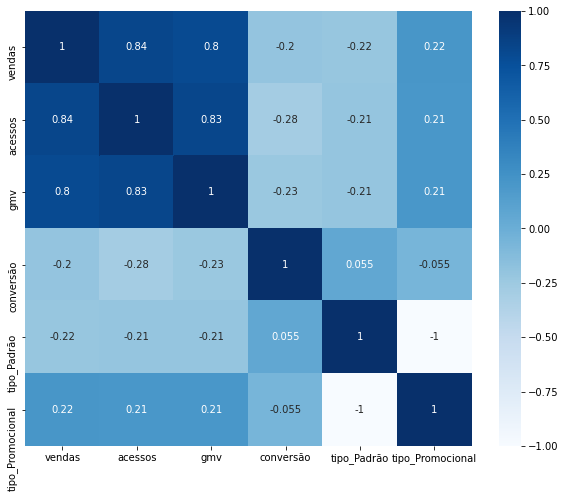

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(correl, cmap="Blues", center=0, annot=True)
plt.show()

In [41]:
entradas = ['acessos', 'gmv', 'conversão', 'tipo_Padrão', 'tipo_Promocional']
x = df_dummies[entradas]
y = df_dummies['vendas']

In [42]:
from sklearn.model_selection import train_test_split

SEED = 13

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [43]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=13, tol=0.0001, verbose=0)

In [44]:
predicoes_vendas = modelo.predict(x_teste)

In [68]:
modelo.score(x_teste, y_teste)

0.4539641509810053

(-50.0, 200.0)

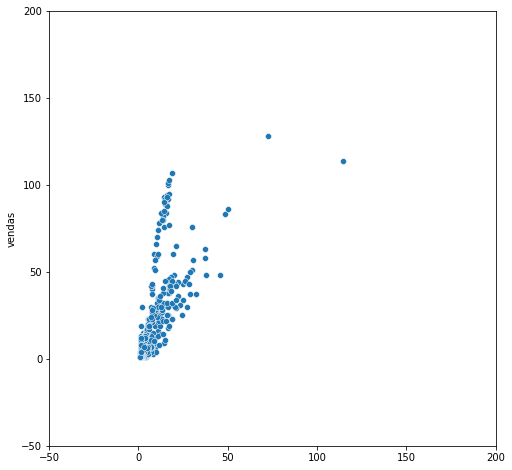

In [45]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_vendas, y=y_teste)
plt.xlim((-50, 200))
plt.ylim((-50, 200))

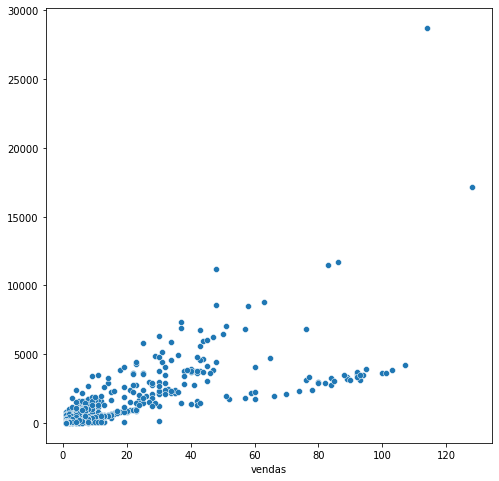

In [46]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1))

In [47]:
resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_vendas
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [48]:
resultados

,Real,Previsao,diferenca,quadrado_diferenca
26603,1,1.507147,-0.507147,2.571982e-01
1054,1,1.012532,-0.012532,1.570471e-04
25332,1,1.154445,-0.154445,2.385332e-02
8146,1,1.006399,-0.006399,4.095019e-05
26721,1,1.068441,-0.068441,4.684189e-03
...,...,...,...,...
16122,1,1.066045,-0.066045,4.361972e-03
8390,1,1.000311,-0.000311,9.702980e-08
8443,1,1.056761,-0.056761,3.221860e-03
30989,4,1.438269,2.561731,6.562464e+00


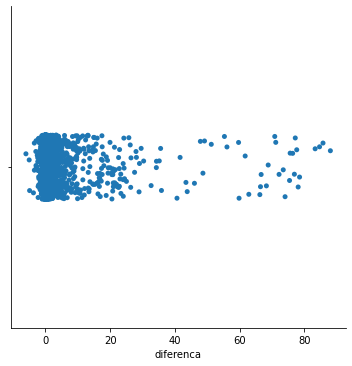

In [49]:
sns.catplot(data=resultados, x='diferenca')

In [50]:
resultados.describe()

,Real,Previsao,diferenca,quadrado_diferenca
count,8324.000000,8324.000000,8324.000000,8.324000e+03
mean,2.274387,1.542415,0.731973,2.649094e+01
std,7.042100,2.776490,5.094926,3.237068e+02
min,1.000000,0.981213,-6.029859,6.829079e-12
25%,1.000000,1.004358,-0.048474,3.829083e-05
50%,1.000000,1.024169,-0.009596,5.789661e-04
75%,1.000000,1.157726,0.000930,2.665188e-02
max,128.000000,114.799292,88.042096,7.751411e+03


In [51]:
dif_baixa = resultados.query("diferenca > -0.001 & diferenca < 0.001")
dif_baixa.describe()

,Real,Previsao,diferenca,quadrado_diferenca
count,511.0,511.000000,511.000000,5.110000e+02
mean,1.0,1.000056,-0.000056,3.305496e-07
std,0.0,0.000573,0.000573,2.955669e-07
min,1.0,0.999003,-0.001000,6.829079e-12
25%,1.0,0.999546,-0.000498,5.603074e-08
50%,1.0,1.000132,-0.000132,2.410683e-07
75%,1.0,1.000498,0.000454,5.725433e-07
max,1.0,1.001000,0.000997,9.990903e-07


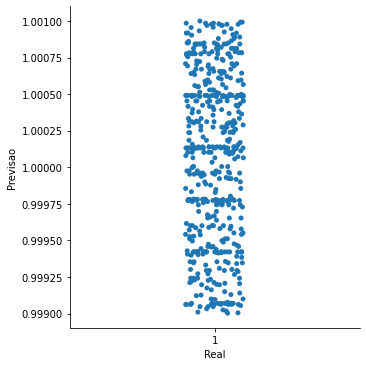

In [52]:
sns.catplot(data=dif_baixa, x='Real', y="Previsao")

<Figure size 576x576 with 0 Axes>

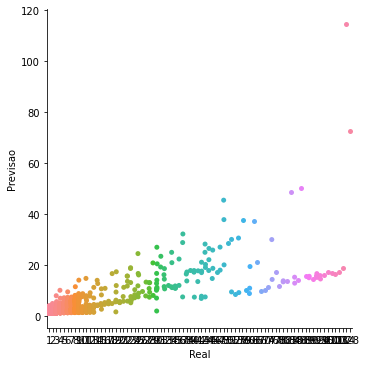

In [53]:
plt.figure(figsize=(8,8))
sns.catplot(data=resultados, x='Real', y="Previsao")
plt.show()

In [54]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

49.6106880472455

In [56]:
mean_squared_error(y_teste, predicoes_vendas)

26.490935459780598

In [57]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_vendas_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_vendas_arvore)

7.802990443780011

In [58]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()


In [59]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança -207.59421894696305 - 292.7563929314661


In [60]:
resultados["test_score"]*-1

array([7.98953963e-02, 7.98953963e-02, 7.98953963e-02, 7.98953963e-02,
       7.98953963e-02, 7.98897642e-02, 7.98897642e-02, 7.98897642e-02,
       7.38455750e+00, 4.17787166e+02])

In [61]:
resultados = pd.DataFrame(resultados)
resultados

,fit_time,score_time,test_score
0,0.015162,0.001141,-0.079895
1,0.018644,0.001641,-0.079895
2,0.014779,0.001173,-0.079895
3,0.014532,0.001129,-0.079895
4,0.014046,0.001095,-0.079895
5,0.013915,0.001130,-0.079890
6,0.014678,0.001104,-0.079890
7,0.013918,0.001165,-0.079890
8,0.013366,0.001100,-7.384558
9,0.012806,0.001173,-417.787166


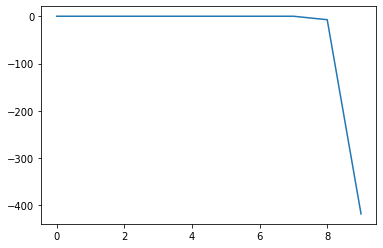

In [62]:
plt.plot(resultados['test_score'])

In [63]:
from sklearn.linear_model import LogisticRegression

df = df_dummies.drop(columns='vendas')
X = df.values
y = df_dummies['vendas']

model = LogisticRegression(solver='liblinear')
model.fit(X,y)

model.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8937678330079591

In [64]:
df = df_dummies.drop(columns='acessos')
X = df.values
y = df_dummies['acessos']

model = LogisticRegression(solver='liblinear')
model.fit(X,y)

model.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7066526505481303

In [65]:
df = df_dummies.drop(columns='tipo_Promocional')
X = df.values
y = df_dummies['tipo_Promocional']

model = LogisticRegression(solver='liblinear')
model.fit(X,y)

model.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.998137858537318